# Pymaceuticals Inc.
---

### Analysis

* 249 mice who were identified with SCC tumors involved in this research
* Out of 249 one mouse(mouse ID : g989) has duplicate timeppoints
* With given dataset for 248 mice following is the statistical summary,
     * Ramicane (40.216745) & Capomulin (40.675741) has the lowest Average tumor volume
     * Standard deviations of Ramican(4.846308) and Capomulin (4.994774) are comparitively less than other drugs,    which means their outputs are consistant and tumor volume of the mice over the timepoints are more closer to average tumor volume
     * Capomulin has 230 timepoints this indicates mice that were given this drug have lived for longer duration than mice that were given other drugs. Where as Ramicane with 228 total timepoints takes the second place
     * This research involved equal number of male(51%) and female(49% mice
     * Capomulin,Ramicane,Ceftamin don't have any potential outliers, which indicates the effect of the drug on mice is consistant. Infubinol has one potential outlier (mouse ID : c326, Tumor Volume : 36.321346)
     * Line plot of tumor volume vs. time point for a mouse(mouse ID : l509) treated with Capomulin shows an effective reduction in tumor volume over a consistent period of usage
     * Correlation between weight of the mouse and tumor volume for the Capomulin drug regimen is found to be 0.84. This is representative of a positive and strong relationship between the 2 parameters. This is close to a perfect linear relationship between the 2 variables.
     * The regression line is deduced as y = 0.95x + 21.56. This suggests that the slope of the line is 0.95. For every change in x (weight of the mouse), y (average tumor volume) changes by  0.95x + 21.56

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn import datasets


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="left")
combined_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mouse_ids = mouse_metadata['Mouse ID'].count()
total_mouse_ids
print(f"The total mice involved in this experiment : {total_mouse_ids}")


The total mice involved in this experiment : 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Finding out mouse ID that has duplicate timestamp
mouse_ids = list(mouse_metadata['Mouse ID'])
clean_data_df = combined_data.copy(deep=True)

# Looping through each group of mouse ID
for i in mouse_ids:
    data_by_mouse_ID_df=combined_data.groupby('Mouse ID').get_group(i)
    
    if(data_by_mouse_ID_df['Timepoint'].count() != len(data_by_mouse_ID_df['Timepoint'].unique())):
        duplicate_timepoint_mousedata_df = data_by_mouse_ID_df.copy(deep=True)
        dup_mouse_id = list(duplicate_timepoint_mousedata_df['Mouse ID'])
        
        # create clean dataframe without duplicates
        condition =  clean_data_df[clean_data_df['Mouse ID'] == dup_mouse_id[0] ].index
        clean_data_df.drop(condition, inplace = True)
        
print(f" The mouse which has duplicate timepoints is : {dup_mouse_id[0]}")
  
    

 The mouse which has duplicate timepoints is : g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_timepoint_mousedata_df
 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
total_mice = len(clean_data_df['Mouse ID'].unique())
print(f" cleaned data has {total_mice} mice")

 cleaned data has 248 mice


## Summary Statistics

In [7]:
# Summary statistics for all drugs

summary_stats_df = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
summary_stats_df.rename(columns={'mean':'Mean Tumor Volume',
                           'median':'Median Tumor Volume',
                           'var':'Tumor Volume Variance',
                           'std':'Tumor Volume Std. Dev.',
                           'sem':'Tumor Volume Std. Err'
                          },inplace=True)

summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

result = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
a = ['Tumor Volume (mm3)','Tumor Volume (mm3)','Tumor Volume (mm3)','Tumor Volume (mm3)','Tumor Volume (mm3)']
b = ['mean','median','var','std','sem']
result.columns = pd.MultiIndex.from_arrays([a,b])
dfStyler = result.style.set_properties(**{'text-align': 'right'})
dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'right')])])

# Using the aggregation method, produce the same summary statistics in a single line.
dfStyler


## Bar and Pie Charts

<AxesSubplot:title={'center':'Drugs vs Total Timepoints'}, xlabel='Drug Regimen', ylabel='Total Timepoints of all mice tested'>

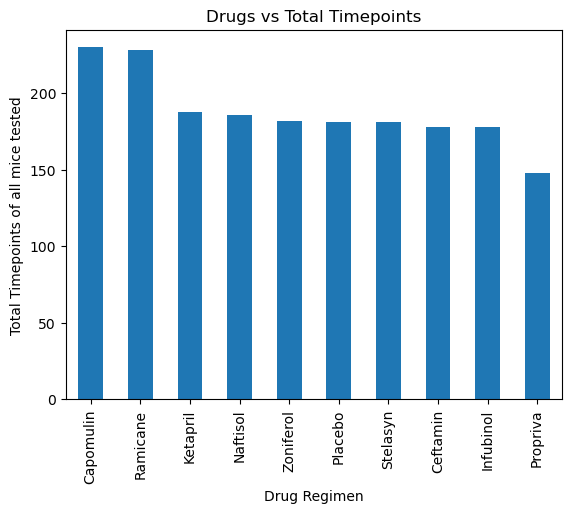

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

total_timepoint_df = clean_data_df.groupby(['Drug Regimen'])[['Timepoint']].count()
total_timepoint_df.sort_values('Timepoint',ascending=False,inplace=True)
total_timepoint_df.plot(kind='bar',title="Drugs vs Total Timepoints",ylabel="Total Timepoints of all mice tested",legend=False)



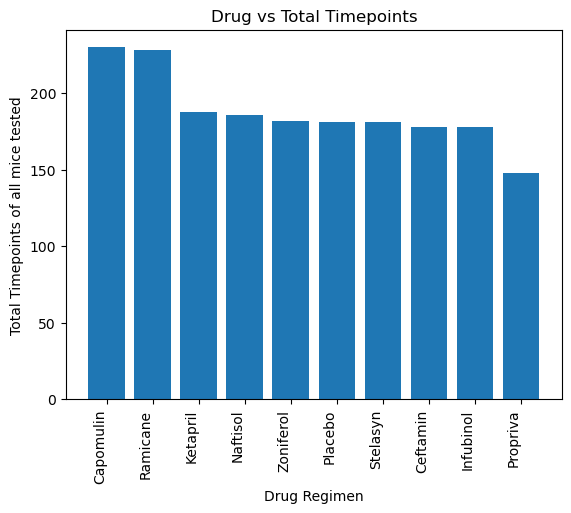

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

y_axis=list(total_timepoint_df['Timepoint'])
x_axis=list(total_timepoint_df.index)
plt.bar(x_axis, y_axis, align="center")
plt.xticks(rotation=90, ha='right')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints of all mice tested')
plt.title('Drug vs Total Timepoints')
plt.show()

array([<AxesSubplot:ylabel='Sex'>], dtype=object)

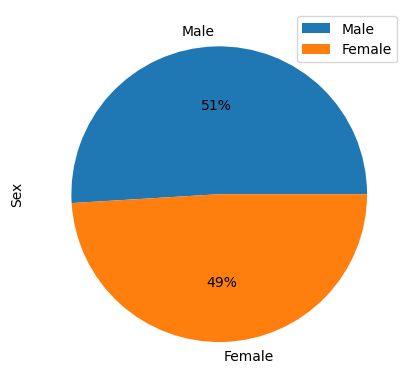

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

total_bysex = clean_data_df.groupby('Sex')[['Mouse ID']].count()
total_bysex.sort_values('Sex',ascending=False,inplace=True)
total_bysex.rename(columns={'Mouse ID':'Sex'},inplace=True)
total_bysex.plot(kind='pie',subplots=True,autopct='%1.0f%%')


Text(0, 0.5, 'Sex')

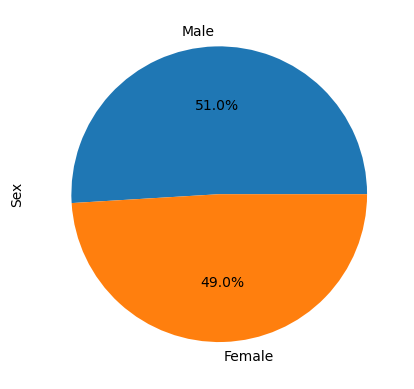

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

label = list(total_bysex.index)
data = list(total_bysex['Sex'])
plt.pie(data, labels = label,autopct="%1.1f%%")
plt.ylabel('Sex')


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Function to find the latest timepoint tumor volume of each drug 
def final_tumor_size(data,mouse_groups):
        f1 = pd.DataFrame({'Mouse ID':[],'Drug Regimen':[],'Timepoint':[],'Tumor Volume (mm3)':[]})
        for i in mouse_groups:
            df = data.groupby(['Mouse ID'])[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']].get_group(i)
            df.sort_values('Timepoint',ascending=False,inplace=True)
            temp_store_df = df.iloc[[0]] 
            f1 = pd.concat([f1, temp_store_df])
        return(f1)

# Create dataframes that has latest tumor volume of respective drug regimens

# Capomulin
Capomulin_df = clean_data_df.groupby(['Drug Regimen'])[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)','Weight (g)']].get_group('Capomulin')
this_group_mouse = list(Capomulin_df['Mouse ID'].unique())
Capomulin_tumorvol_df = final_tumor_size(Capomulin_df,this_group_mouse)
#Capomulin_tumorvol_df

# Ramicane
Ramicane_df = clean_data_df.groupby(['Drug Regimen'])[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']].get_group('Ramicane')
this_group_mouse = list(Ramicane_df['Mouse ID'].unique())
Ramicane_tumorvol_df = final_tumor_size(Ramicane_df,this_group_mouse)
#Ramicane_tumorvol_df

# Infubinol
Infubinol_df = clean_data_df.groupby(['Drug Regimen'])[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']].get_group('Infubinol')
this_group_mouse = list(Infubinol_df['Mouse ID'].unique())
Infubinol_tumorvol_df = final_tumor_size(Infubinol_df,this_group_mouse)
#Infubinol_tumorvol_df

# Ceftamin
Ceftamin_df = clean_data_df.groupby(['Drug Regimen'])[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']].get_group('Ceftamin')
this_group_mouse = list(Ceftamin_df['Mouse ID'].unique())
Ceftamin_tumorvol_df = final_tumor_size(Ceftamin_df,this_group_mouse)
#Ceftamin_tumorvol_df



In [14]:
# Findig out the outliers of each Drug regimens

# function to find the outliers
def find_outliers(dataframe):
    quartiles = dataframe['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    return (lower_bound,upper_bound,iqr)

output_Capomulin = find_outliers(Capomulin_tumorvol_df)
outliers_Capomulin = Capomulin_tumorvol_df.loc[(Capomulin_tumorvol_df['Tumor Volume (mm3)'] < output_Capomulin[0]) | (Capomulin_tumorvol_df['Tumor Volume (mm3)'] > output_Capomulin[1])]

output_Ramicane = find_outliers(Ramicane_tumorvol_df)
outliers_Ramicane = Ramicane_tumorvol_df.loc[(Ramicane_tumorvol_df['Tumor Volume (mm3)'] < output_Ramicane[0]) | (Ramicane_tumorvol_df['Tumor Volume (mm3)'] > output_Ramicane[1])]

output_Infubinol = find_outliers(Infubinol_tumorvol_df)
outliers_Infubinol = Infubinol_tumorvol_df.loc[(Infubinol_tumorvol_df['Tumor Volume (mm3)'] < output_Infubinol[0]) | (Infubinol_tumorvol_df['Tumor Volume (mm3)'] > output_Infubinol[1])]

output_Ceftamin = find_outliers(Ceftamin_tumorvol_df)
outliers_Ceftamin = Ceftamin_tumorvol_df.loc[(Ceftamin_tumorvol_df['Tumor Volume (mm3)'] < output_Ceftamin[0]) | (Ceftamin_tumorvol_df['Tumor Volume (mm3)'] > output_Ceftamin[1])]

print(f"Capomulin's potential outliers :\n{outliers_Capomulin.squeeze(axis=0)}\n") 
print(f"Capomulin's IQR :s{round(output_Capomulin[2],2)}\n\n") 

print(f"Ramicane's potential outliers :\n{outliers_Ramicane.squeeze(axis=0)}\n") 
print(f"Ramicane's IQR :{round(output_Ramicane[2],2)}\n\n") 

print(f"Infubinol's potential outliers :\n{outliers_Infubinol.squeeze(axis=0)}\n") 
print(f"Infubinol's IQR :{round(output_Infubinol[2],2)}\n\n") 

print(f"Ceftamin's potential outliers :\n{outliers_Ceftamin.squeeze(axis=0)}\n") 
print(f"Ceftamin's IQR :{round(output_Ceftamin[2],2)}\n\n") 

    

Capomulin's potential outliers :
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Timepoint, Tumor Volume (mm3)]
Index: []

Capomulin's IQR :s7.78


Ramicane's potential outliers :
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Timepoint, Tumor Volume (mm3)]
Index: []

Ramicane's IQR :9.1


Infubinol's potential outliers :
Mouse ID                   c326
Drug Regimen          Infubinol
Timepoint                   5.0
Tumor Volume (mm3)    36.321346
Name: 669, dtype: object

Infubinol's IQR :11.48


Ceftamin's potential outliers :
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Timepoint, Tumor Volume (mm3)]
Index: []

Ceftamin's IQR :15.58




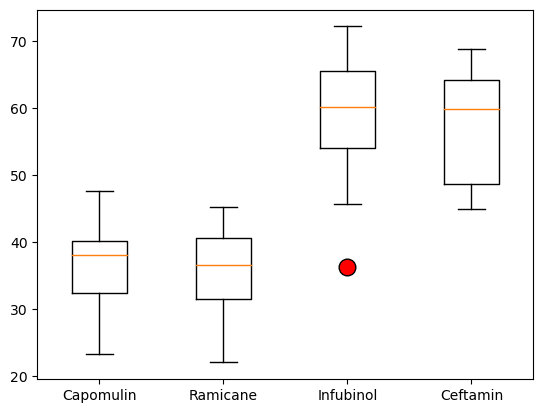

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

dist_tumourvolume = {'Capomulin': list(Capomulin_tumorvol_df['Tumor Volume (mm3)']),'Ramicane': list(Ramicane_tumorvol_df['Tumor Volume (mm3)']),'Infubinol': list(Infubinol_tumorvol_df['Tumor Volume (mm3)']),'Ceftamin': list(Ceftamin_tumorvol_df['Tumor Volume (mm3)'])}
flierprops = dict(marker='o', markerfacecolor='red', markersize=12,
                  linestyle='none')
fig, ax = plt.subplots()
ax.boxplot(dist_tumourvolume.values(),flierprops=flierprops)
ax.set_xticklabels(dist_tumourvolume.keys())
plt.show()


## Line and Scatter Plots

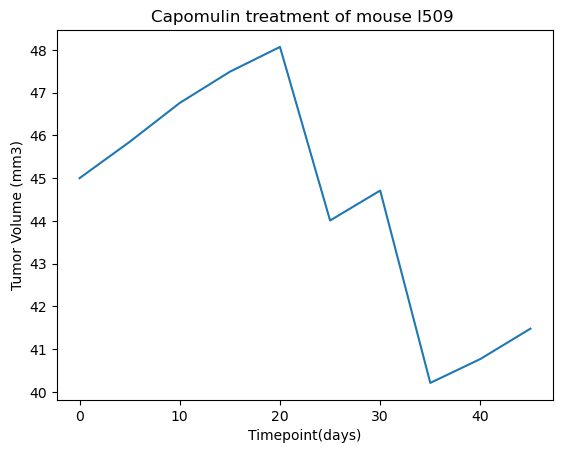

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse ID : l509 treated with Capomulin

df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == "l509"]
y = list(round(df['Tumor Volume (mm3)'],2))
x = list(round(df['Timepoint'],2))
plt.plot(x,y)  
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509 ")
plt.show()


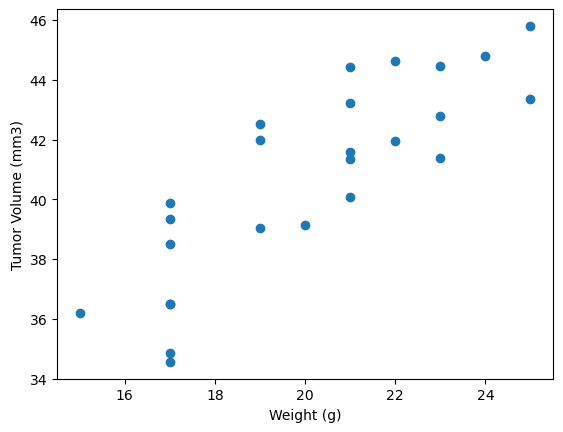

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Extract the capomulin tumor vol vs weight data

df_Cap = Capomulin_df.groupby('Mouse ID')[['Tumor Volume (mm3)','Weight (g)']].mean()

# Setting the scatter plot parameters and show it

x = list(round(df_Cap['Weight (g)'],2))
y = list(round(df_Cap['Tumor Volume (mm3)'],2))
plt.scatter(x,y)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.7087213191554544


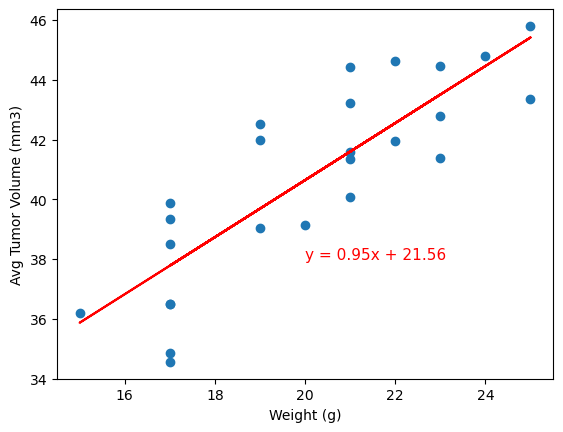

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Extract the capomulin tumor vol vs weight data
df_Cap = Capomulin_df.groupby('Mouse ID')[['Tumor Volume (mm3)','Weight (g)']].mean()
x_values = round(df_Cap['Weight (g)'],2)
y_values = round(df_Cap['Tumor Volume (mm3)'],2)


# Setting the scatter plot parameters
x_values = round(df_Cap['Weight (g)'],2)
y_values = round(df_Cap['Tumor Volume (mm3)'],2)
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(st.pearsonr(x_values,y_values)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Show scatter plot with regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(20,38),xytext=(20,38),fontsize=11,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
